<a href="https://colab.research.google.com/github/michelleruas/Cancer-Detection-ML/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification

This program will use machine learning to classify images.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
#Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
#For x_train shape we get a 4 dimensional array. 50,000 images of 32x32 and depth 3
#y_train is 2 dimensions, 50,000 rows of data with depth 1

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [10]:
#Take a look at the first image as an array
index = 1
x_train[index]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

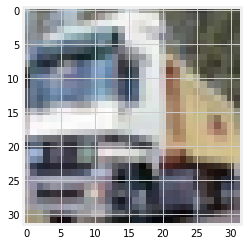

In [12]:
#Show image as a picture
img = plt.imshow(x_train[index])

In [13]:
#Get the label of the image
print('The image label is:', y_train[index])
#Each number corresponds to a classification. 6 = frog.

The image label is: [9]


In [11]:
#Get classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print image class
print('The image class is:', classification[y_train[index][0]])

The image class is: truck


# Preparing the data for the neural network

In [15]:
#Convert labels into a set of 10 numbers to input into neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [16]:
#Print new labels
print(y_train_one_hot)
#Set up 10 numbers. All colums will be 0, one will be 1 corresponding to that label

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [17]:
#Print new label of image/ picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [18]:
#Normalise the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [19]:
x_train[index]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [23]:
#Create models architecture
model = Sequential()

#Add the first layer which will be a convulution layer to extract features from the image, will create 32 5x5 convuluted features / feature maps
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (32,32,3)) )

#Add the next layer. This is a pooling layer. Create a pooling layer with a 2x2 pixel filter to get the max element from the feature maps
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another layer. Add a 2nd convolution layer
model.add(Conv2D(32, (5,5), activation = 'relu') )

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer 
model.add(Flatten())

#Take all of this data and put it into some neurons.
#Add a layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))

#Add a dropout layer with a 50% dropout rate
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation = 'relu'))

#Add a dropout layer with a 50% dropout rate
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation = 'relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation = 'softmax'))

In [24]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [25]:
#Train the model
hist = model.fit(x_train, y_train_one_hot, 
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 56s 355ms/step - loss: 1.8102 - accuracy: 0.3230 - val_loss: 1.5160 - val_accuracy: 0.4407
Epoch 2/10
157/157 [==============================] - 55s 353ms/step - loss: 1.4306 - accuracy: 0.4746 - val_loss: 1.3690 - val_accuracy: 0.5070
Epoch 3/10
157/157 [==============================] - 55s 353ms/step - loss: 1.2966 - accuracy: 0.5318 - val_loss: 1.2121 - val_accuracy: 0.5600
Epoch 4/10
157/157 [==============================] - 55s 353ms/step - loss: 1.1963 - accuracy: 0.5712 - val_loss: 1.1357 - val_accuracy: 0.5949
Epoch 5/10
157/157 [==============================] - 55s 353ms/step - loss: 1.1205 - accuracy: 0.5990 - val_loss: 1.0793 - val_accuracy: 0.6085
Epoch 6/10
157/157 [==============================] - 55s 353ms/step - loss: 1.0426 - accuracy: 0.6302 - val_loss: 1.1077 - val_accuracy: 0.6097
Epoch 7/10
157/157 [==============================] - 55s 352ms/step - loss: 0.9825 - accuracy: 0.6507 - val_loss: 1.1178 - val_ac

In [26]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 1.0307 - accuracy: 0.6542


0.65420001745224

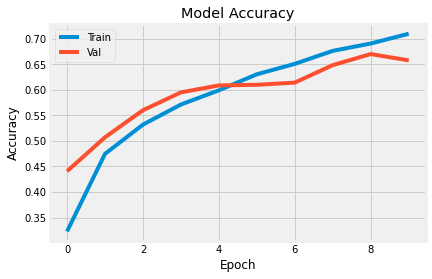

In [28]:
#Visualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

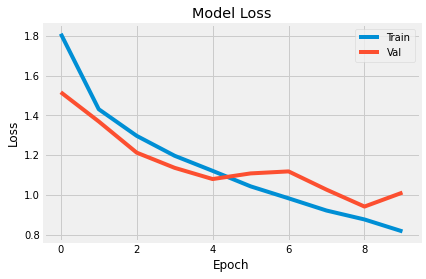

In [29]:
#Visualise the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [30]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving download.jpg to download.jpg


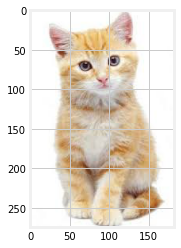

In [31]:
#Show the image
new_image = plt.imread('download.jpg')
img = plt.imshow(new_image)

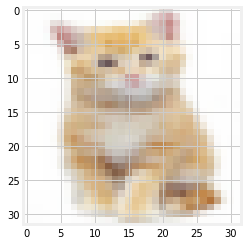

In [32]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [33]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions
#The highest value is what the model belives it is

array([[2.0085435e-04, 1.1471851e-04, 4.5740418e-02, 5.5303317e-01,
        2.4176964e-03, 3.6094153e-01, 3.2878157e-02, 3.8697862e-03,
        2.9189262e-04, 5.1182602e-04]], dtype=float32)

In [34]:
#Sort the predicitons from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order
print(list_index)

[3, 5, 2, 6, 7, 4, 9, 8, 0, 1]


In [37]:
#Print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 55.3 %
dog : 36.09 %
bird : 4.57 %
frog : 3.29 %
horse : 0.39 %


This model predicts that this image: 



```
new_image = plt.imread('download.jpg')
img = plt.imshow(new_image)
```

Is a 


```
list_index[0]
```






This image is a : cat


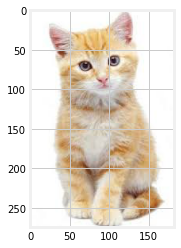

In [42]:
#This model predicts that this image: 

new_image = plt.imread('download.jpg')
img = plt.imshow(new_image)

print('This image is a :', classification[list_index[0]])
